In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv("housing.csv")

In [2]:
df= df.drop(['total_bedrooms', 'households'], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,322,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,2401,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,496,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,558,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,565,3.8462,342200,NEAR BAY


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Define X and y
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Step 2: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Identify columns
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Step 4: Create transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Step 5: Apply transformations
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)  # Only transform test data!



In [5]:
# Convert to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now view it
# print(X_train_scaled_df.head())
# X_test_scaled

Best alpha: 0.01
RMSE: 69095.18
MAE: 49712.56
R²: 0.6339


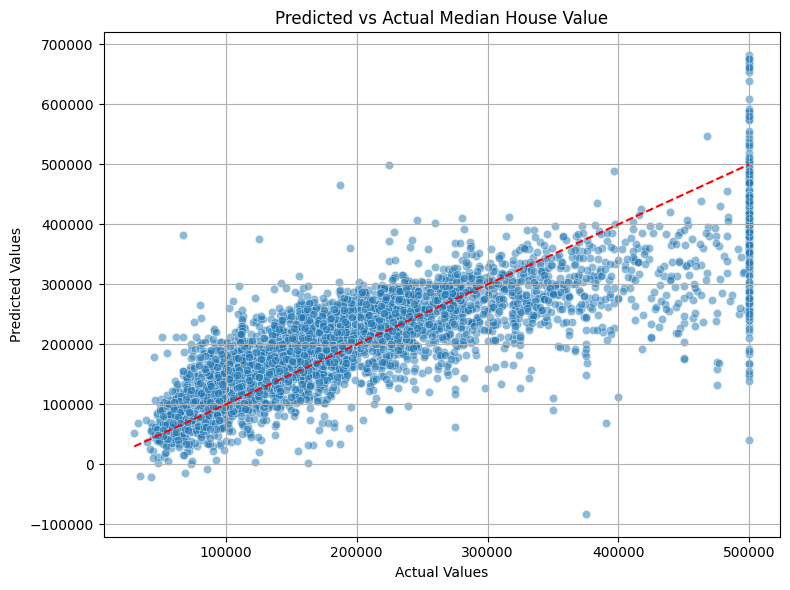

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your data
df = pd.read_csv('housing.csv')  # replace with your actual path

# Drop unnecessary columns
df = df.drop(['households', 'total_rooms'], axis=1)

# Split features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Identify column types
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing: scale numeric, encode categorical
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Model pipeline with Ridge (can be changed to Lasso or ElasticNet)
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', Ridge())
])

# Hyperparameter tuning
param_grid = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best alpha:", grid_search.best_params_['model__alpha'])
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Median House Value')
plt.grid(True)
plt.tight_layout()
plt.show()


Best Parameters: {'poly__degree': 2, 'ridge__alpha': 0.1}
Improved RMSE: 65890.95
Improved MAE: 46739.49
Improved R² Score: 0.6671


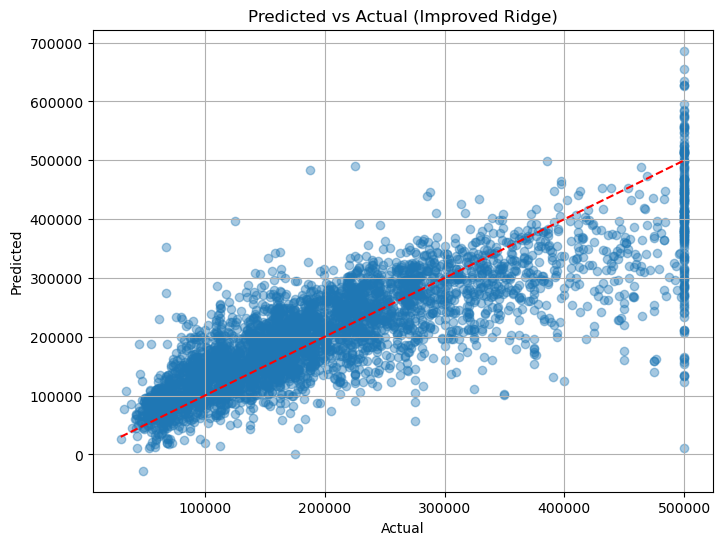

In [38]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Create a new pipeline with Polynomial Features
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),  # capture interactions
    ("ridge", Ridge())
])

# Grid search over alpha (regularization strength)
param_grid = {
    "ridge__alpha": [0.1, 1.0, 10.0, 100.0],
    "poly__degree": [1, 2]  # Try linear and quadratic models
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

# Train
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict
y_pred = best_model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved RMSE: {rmse:.2f}")
print(f"Improved MAE: {mae:.2f}")
print(f"Improved R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Improved Ridge)")
plt.grid(True)
plt.show()


Polynomial Degree: 2
RMSE: 64570.27
MAE: 45556.12
R²: 0.6803
Accuracy: 68.03%


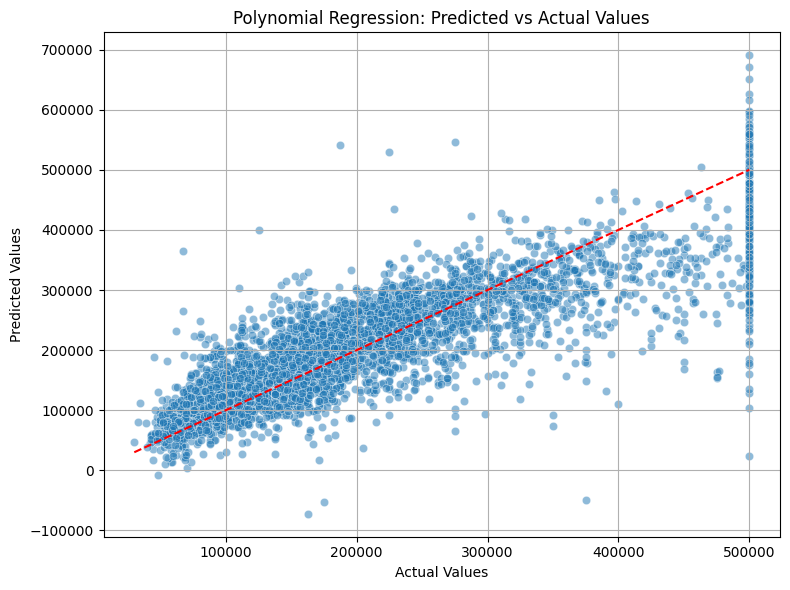

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('housing.csv')  # Replace with your actual file path

# Drop specified columns
df = df.drop(['households', 'total_rooms'], axis=1)

# Separate features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Column transformer: scaling numeric and one-hot encoding categorical
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Pipeline with Polynomial Features and Linear Regression
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # You can change degree
    ('model', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # Interpreting R² as accuracy

print(f"Polynomial Degree: 2")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Predicted vs Actual Values')
plt.grid(True)
plt.tight_layout()
plt.show()
